# Introduction to the Tidyverse

## Grouping and summarizing

### Summarizing the median life expectancy

In [1]:
library(gapminder)
library(dplyr)
library(ggplot2)


gapminder %>%  
    summarize(medianLifeExp = median(lifeExp))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




medianLifeExp
<dbl>
60.7125


### Summarizing the median life expectancy in 1957

In [2]:
gapminder %>%  
    filter(year == 1957) %>%
    summarize(medianLifeExp = median(lifeExp))

medianLifeExp
<dbl>
48.3605


### Summarizing multiple variables in 1957

In [3]:

gapminder %>%  
    filter(year == 1957) %>%  
    summarize(medianLifeExp = median(lifeExp), maxGdpPercap = max(gdpPercap))

medianLifeExp,maxGdpPercap
<dbl>,<dbl>
48.3605,113523.1


### Summarizing by year

In [4]:

gapminder %>%  
    group_by(year) %>% 
    summarize(medianLifeExp = median(lifeExp), maxGdpPercap = max(gdpPercap))

year,medianLifeExp,maxGdpPercap
<int>,<dbl>,<dbl>
1952,45.1355,108382.35
1957,48.3605,113523.13
1962,50.8810,95458.11
1967,53.8250,80894.88
1972,56.5300,109347.87
1977,59.6720,59265.48
1982,62.4415,33693.18
1987,65.8340,31540.97
1992,67.7030,34932.92


### Summarizing by continent

In [5]:

gapminder %>%  
    filter(year==1957) %>%
    group_by(continent) %>% 
    summarize(medianLifeExp = median(lifeExp), maxGdpPercap = max(gdpPercap))

continent,medianLifeExp,maxGdpPercap
<fct>,<dbl>,<dbl>
Africa,40.5925,5487.104
Americas,56.0740,14847.127
Asia,48.2840,113523.133
Europe,67.6500,17909.490
Oceania,70.2950,12247.395


### Summarizing by continent and year

In [6]:
gapminder %>%  
    group_by(continent, year) %>% 
    summarize(medianLifeExp = median(lifeExp), maxGdpPercap = max(gdpPercap))

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


continent,year,medianLifeExp,maxGdpPercap
<fct>,<int>,<dbl>,<dbl>
Africa,1952,38.8330,4725.296
Africa,1957,40.5925,5487.104
Africa,1962,42.6305,6757.031
Africa,1967,44.6985,18772.752
Africa,1972,47.0315,21011.497
Africa,1977,49.2725,21951.212
Africa,1982,50.7560,17364.275
Africa,1987,51.6395,11864.408
Africa,1992,52.4290,13522.158


### Visualizing median life expectancy over time

In [7]:
by_year <- gapminder %>%
  group_by(year) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))

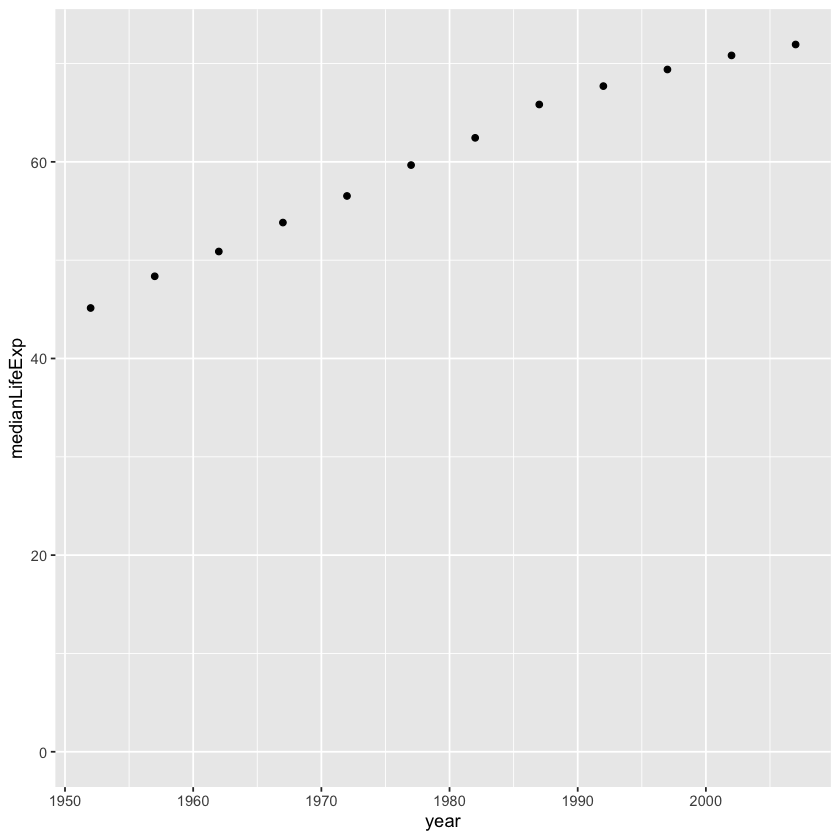

In [8]:

ggplot(by_year, aes(x = year, y = medianLifeExp)) +  geom_point() + expand_limits(y =0)

### Visualizing median GDP per capita per continent over time

In [9]:
by_year_continent <- gapminder %>%
  group_by(continent, year) %>%
  summarize(medianGdpPercap = median(gdpPercap))

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


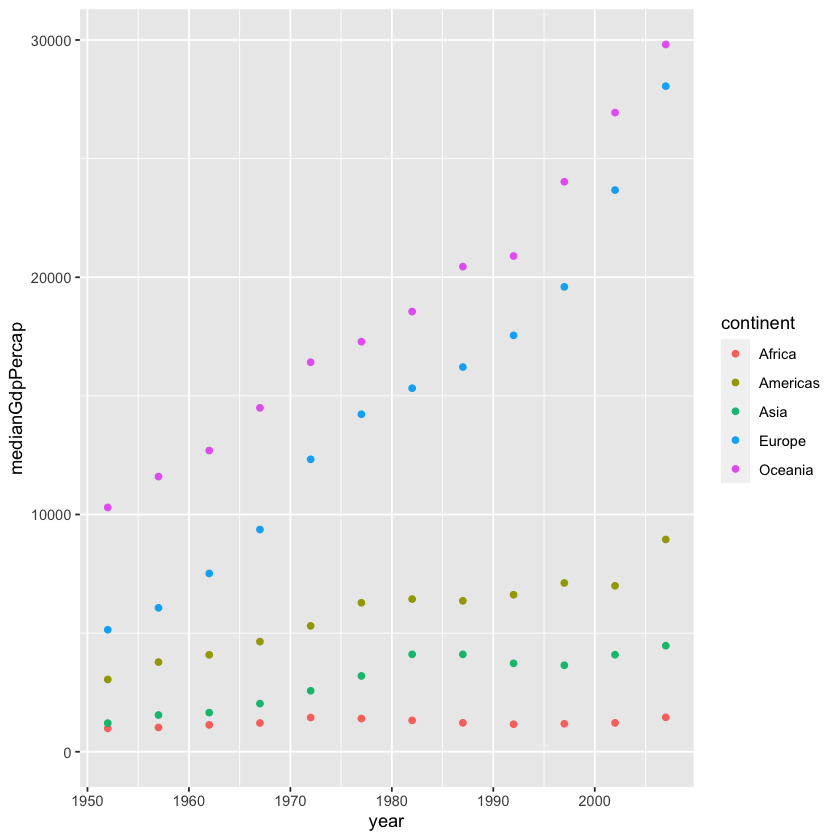

In [10]:
ggplot(by_year_continent, aes(x = year, y = medianGdpPercap, color=continent)) +  geom_point() + expand_limits(y =0)

### Comparing median life expectancy and median GDP per continent in 2007

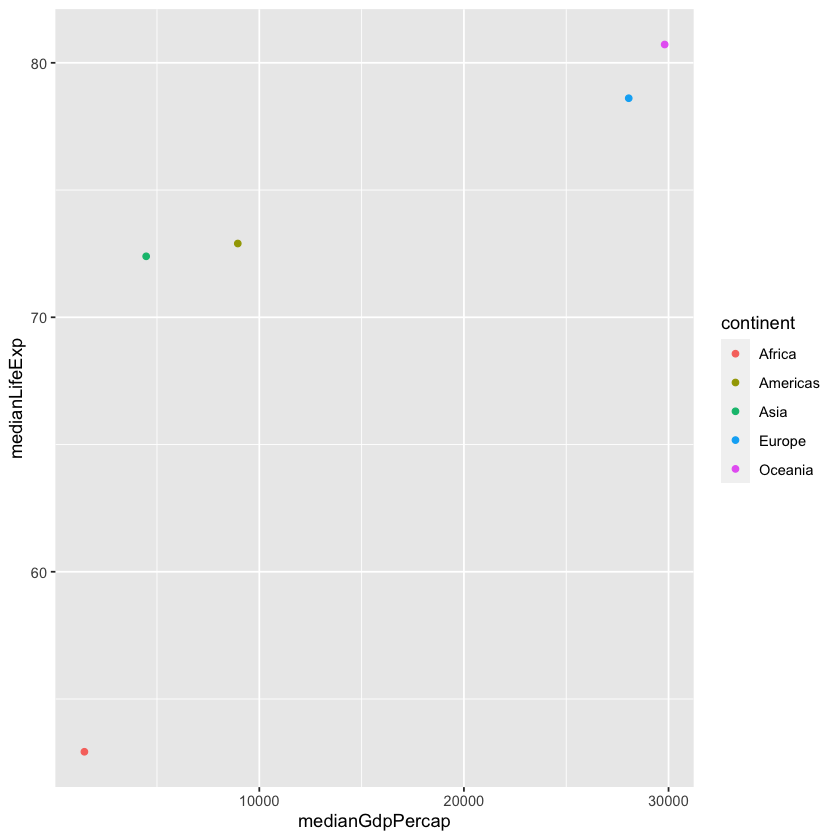

In [11]:

by_continent_2007 <- gapminder %>%
    filter(year==2007) %>%
    group_by(continent) %>% 
    summarize(medianLifeExp = median(lifeExp), medianGdpPercap = median(gdpPercap))


ggplot(by_continent_2007, aes(x = medianGdpPercap, y = medianLifeExp,color=continent)) + geom_point()